In [24]:
%config InlineBackend.figure_formats = ['svg']
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
levels = ['cd113', 'leg2012_upper', 'leg2012_lower']

In [41]:
states = set()
level_dfs = {}
all_bvaps = []
for level in levels:
    rows = []
    for filename in glob.glob(f'{level}_vap_with_race/*.csv'):
        if 'CA' not in filename:
            row = {}
            postal_code = filename.split('/')[-1].split('_')[1]
            states.add(postal_code)
            df = pd.read_csv(filename)
            df['black_share'] = df['black'] / df['total']
            n_districts = len(df[df['district'] != 'ZZ'])
            for cutoff in (0.25, 0.3, 0.35, 0.4, 0.45, 0.5):
                n_opp = len(df['black_share'][df['black_share'] >= cutoff])
                row[f'black_districts_{cutoff * 100}'] = n_opp
                row[f'black_district_{cutoff * 100}_pct'] = round(100 * (n_opp / n_districts), 3)
            row = {
                'state': postal_code,
                'total_districts': n_districts,
                'black_vap': df['black'].sum(),
                'total_vap': df['total'].sum(),
                'black_vap_pct': round(100 * df['black'].sum() / df['total'].sum(), 3),
                **row
            }
            rows.append(row)
    states_df = pd.DataFrame(rows)
    level_dfs[level] = states_df
    states_df.to_csv(f'{level}_summary_all.csv', index=False)

In [35]:
states_df

,state,black_districts,total_districts,black_vap,total_vap,black_district_pct,black_vap_pct
0,SC,30,124,939461.0,3544890.0,24.194,26.502
1,TN,13,99,755492.0,4850104.0,13.131,15.577
2,AZ,0,30,182710.0,4763003.0,0.000,3.836
3,GA,47,180,2097470.0,7196101.0,26.111,29.147
4,NJ,1,40,883471.0,6726680.0,2.500,13.134
5,AR,11,100,315462.0,2204443.0,11.000,14.310
6,NV,0,42,158545.0,2035543.0,0.000,7.789
7,TX,1,150,2123923.0,18279737.0,0.667,11.619
8,NC,18,120,1497453.0,7253848.0,15.000,20.644
9,VA,12,100,1151835.0,6147347.0,12.000,18.737


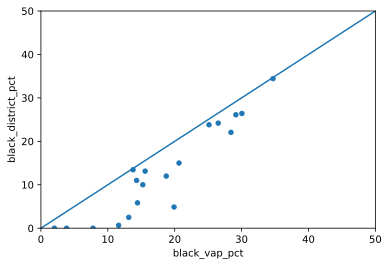

In [34]:
states_df.plot.scatter('black_vap_pct', 'black_district_pct')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.plot([0, 100], [0, 100])
plt.savefig('lower_50_cutoff.png', dpi=300)
plt.show()

### TikZ generation

In [38]:
all_bvaps

[13.134,
 29.147,
 28.414,
 34.701,
 18.737,
 14.436,
 13.769,
 15.231,
 15.577,
 11.619,
 30.048,
 14.31,
 2.014,
 3.836,
 26.502,
 19.9,
 20.644,
 24.07,
 7.789]